In [1]:
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import seaborn as sns

from skimage.io import imread, imsave

from toskipornot.features.analyze_features import *
from toskipornot.data.utils import compute_and_plot_histogram, make_blurry_background_image, make_speckle_image

/Users/amithkamath/opt/anaconda3/envs/geomvar-env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
generate_data = True

root_dir = "/Users/amithkamath/repo/toskipornot"
input_folder = "GLaS-processed"
output_folder = "GLaS-experiment"

In [3]:
medical_data_path = os.path.join(root_dir, "data", input_folder, "testB")

medical_data_images = os.path.join(medical_data_path, "image")
image_data = sorted(glob(os.path.join(medical_data_images, "*.png")))

medical_data_labels = os.path.join(medical_data_path, "label")
label_data = sorted(glob(os.path.join(medical_data_labels, "*.png")))

100%|██████████| 80/80 [00:01<00:00, 56.90it/s]


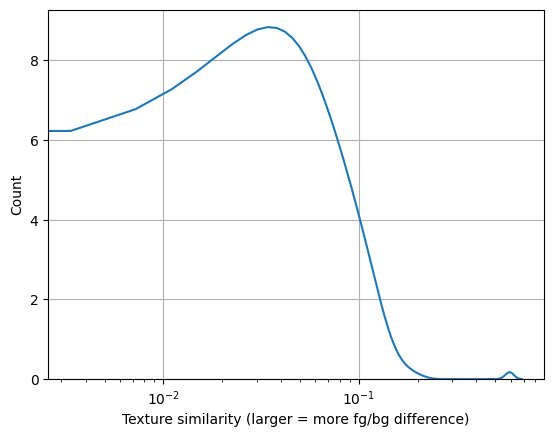

100%|██████████| 80/80 [00:01<00:00, 61.86it/s]


In [4]:
texture_similarity = compute_and_plot_histogram(image_data, label_data)

in_domain_output_path = os.path.join(root_dir, "data", output_folder, "in-domain", "test")
os.makedirs(os.path.join(in_domain_output_path, "image"), exist_ok=True)
os.makedirs(os.path.join(in_domain_output_path, "label"), exist_ok=True)
if generate_data:
    n_images = len(image_data)
    for image_index in tqdm(range(n_images)):
        image = imread(image_data[image_index])
        label = imread(label_data[image_index])

        imsave(os.path.join(in_domain_output_path, "image", "image_" + str(image_index).zfill(4) + ".png"), image)
        imsave(os.path.join(in_domain_output_path, "label", "label_" + str(image_index).zfill(4) + ".png"), label)

100%|██████████| 80/80 [00:01<00:00, 62.17it/s]


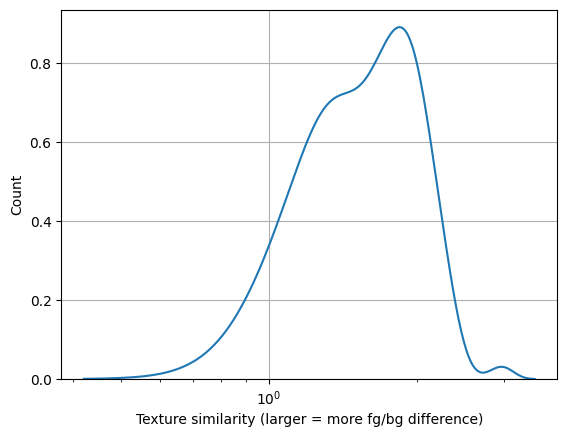

In [5]:
higher_output_path = os.path.join(root_dir, "data", output_folder, "higher", "test")
os.makedirs(os.path.join(higher_output_path, "image"), exist_ok=True)
os.makedirs(os.path.join(higher_output_path, "label"), exist_ok=True)

sigma = 7.0

if generate_data:
    n_images = len(image_data)
    for image_index in tqdm(range(n_images)):
        mod_image, label = make_blurry_background_image(image_data[image_index], label_data[image_index], sigma)

        imsave(os.path.join(higher_output_path, "image", "image_" + str(image_index).zfill(4) + ".png"), mod_image)
        imsave(os.path.join(higher_output_path, "label", "label_" + str(image_index).zfill(4) + ".png"), label)

modified_higher_data_images = os.path.join(higher_output_path, "image")
modified_higher_image_data = sorted(glob(os.path.join(modified_higher_data_images, "*.png")))

modified_higher_data_labels = os.path.join(higher_output_path, "label")
modified_higher_label_data = sorted(glob(os.path.join(modified_higher_data_labels, "*.png")))

modified_higher_texture_similarity = compute_and_plot_histogram(modified_higher_image_data, modified_higher_label_data)

100%|██████████| 80/80 [00:01<00:00, 61.10it/s]


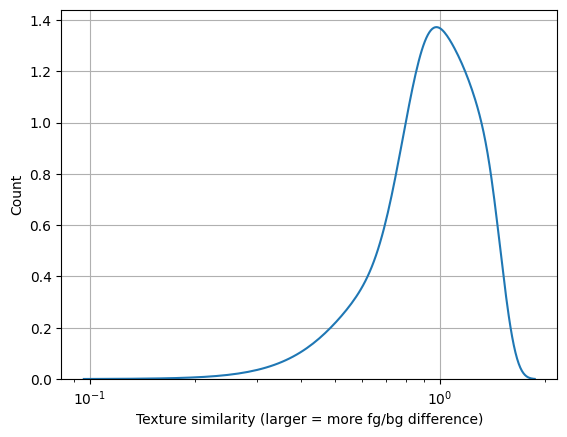

In [6]:
high_output_path = os.path.join(root_dir, "data", output_folder, "high", "test")
os.makedirs(os.path.join(high_output_path, "image"), exist_ok=True)
os.makedirs(os.path.join(high_output_path, "label"), exist_ok=True)

sigma = 3.0

if generate_data:
    n_images = len(image_data)
    for image_index in tqdm(range(n_images)):
        mod_image, label = make_blurry_background_image(image_data[image_index], label_data[image_index], sigma)

        imsave(os.path.join(high_output_path, "image", "image_" + str(image_index).zfill(4) + ".png"), mod_image)
        imsave(os.path.join(high_output_path, "label", "label_" + str(image_index).zfill(4) + ".png"), label)

modified_high_data_images = os.path.join(high_output_path, "image")
modified_high_image_data = sorted(glob(os.path.join(modified_high_data_images, "*.png")))

modified_high_data_labels = os.path.join(high_output_path, "label")
modified_high_label_data = sorted(glob(os.path.join(modified_high_data_labels, "*.png")))

modified_high_texture_similarity = compute_and_plot_histogram(modified_high_image_data, modified_high_label_data)

100%|██████████| 80/80 [00:01<00:00, 61.94it/s]


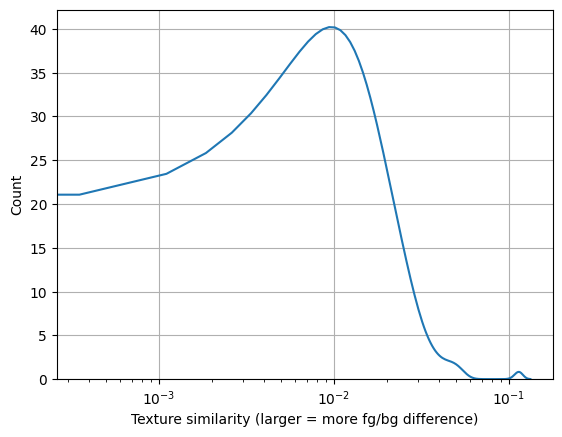

In [7]:
low_output_path = os.path.join(root_dir, "data", output_folder, "low", "test")
os.makedirs(os.path.join(low_output_path, "image"), exist_ok=True)
os.makedirs(os.path.join(low_output_path, "label"), exist_ok=True)

speckle_var = 0.1

if generate_data:
    n_images = len(image_data)
    for image_index in tqdm(range(n_images)):
        mod_image, label = make_speckle_image(image_data[image_index], label_data[image_index], speckle_var)

        imsave(os.path.join(low_output_path, "image", "image_" + str(image_index).zfill(4) + ".png"), mod_image)
        imsave(os.path.join(low_output_path, "label", "label_" + str(image_index).zfill(4) + ".png"), label)

modified_low_data_images = os.path.join(low_output_path, "image")
modified_low_image_data = sorted(glob(os.path.join(modified_low_data_images, "*.png")))

modified_low_data_labels = os.path.join(low_output_path, "label")
modified_low_label_data = sorted(glob(os.path.join(modified_low_data_labels, "*.png")))

modified_low_texture_similarity = compute_and_plot_histogram(modified_low_image_data, modified_low_label_data)

100%|██████████| 80/80 [00:01<00:00, 62.11it/s]


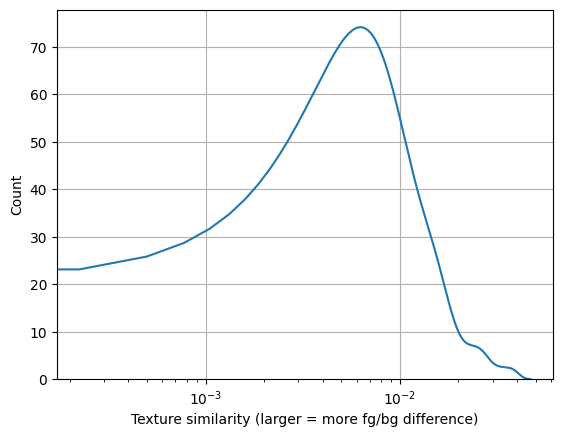

In [8]:
lower_output_path = os.path.join(root_dir, "data", output_folder, "lower", "test")
os.makedirs(os.path.join(lower_output_path, "image"), exist_ok=True)
os.makedirs(os.path.join(lower_output_path, "label"), exist_ok=True)

speckle_var = 0.3

if generate_data:
    n_images = len(image_data)
    for image_index in tqdm(range(n_images)):
        mod_image, label = make_speckle_image(image_data[image_index], label_data[image_index], speckle_var)

        imsave(os.path.join(lower_output_path, "image", "image_" + str(image_index).zfill(4) + ".png"), mod_image)
        imsave(os.path.join(lower_output_path, "label", "label_" + str(image_index).zfill(4) + ".png"), label)

modified_lower_data_images = os.path.join(lower_output_path, "image")
modified_lower_image_data = sorted(glob(os.path.join(modified_lower_data_images, "*.png")))

modified_lower_data_labels = os.path.join(lower_output_path, "label")
modified_lower_label_data = sorted(glob(os.path.join(modified_lower_data_labels, "*.png")))

modified_lower_texture_similarity = compute_and_plot_histogram(modified_lower_image_data, modified_lower_label_data)

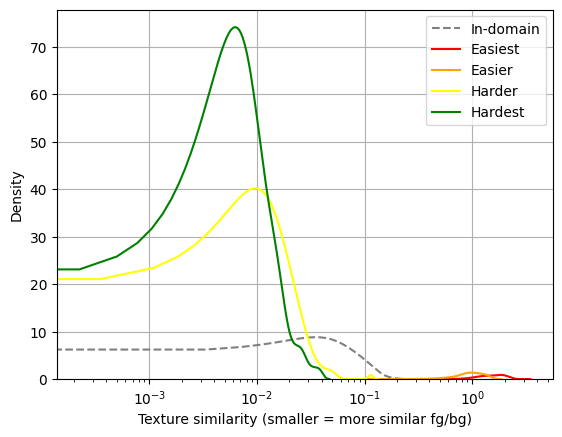

In [9]:
fig, ax = plt.subplots()
plot = sns.kdeplot(data=texture_similarity, linestyle="dashed")
plot = sns.kdeplot(data=modified_higher_texture_similarity)
plot = sns.kdeplot(data=modified_high_texture_similarity)
plot = sns.kdeplot(data=modified_low_texture_similarity)
plot = sns.kdeplot(data=modified_lower_texture_similarity)
cm = sns.color_palette("plasma", 3)

c_idx = 0
for line in ax.lines:
    if c_idx == 0:
        line.set_color("gray")
    elif c_idx == 1:
        line.set_color("red")
    elif c_idx == 2:
        line.set_color("orange")
    elif c_idx == 3:
        line.set_color("yellow")
    elif c_idx == 4:
        line.set_color("green")
    c_idx += 1

plt.xlabel("Texture similarity (smaller = more similar fg/bg)")
plt.ylabel("Density")
plt.xscale("log")
plt.grid()
plt.legend(("In-domain", "Easiest", "Easier", "Harder", "Hardest"))
plt.show()